Applyling several different supervised machine learning techniques to Pima Indians Diabetes Dataset from Kaggle
Decision tree
Random forest
Logistic Regression

In [1]:
#Importing data using pandas
import pandas as pd

In [2]:
diabetes_data=pd.read_csv("diabetes.csv")

In [3]:
diabetes_data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
diabetes_data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [5]:
diabetes_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
diabetes_data.loc[(diabetes_data['Pregnancies'].isnull())|
                 (diabetes_data['Glucose'].isnull())|
                 (diabetes_data['BloodPressure'].isnull())|
                 (diabetes_data['Insulin'].isnull())|
                 (diabetes_data['BMI'].isnull())|
                 (diabetes_data['Age'].isnull())
                 ]

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

In [9]:
diabetes_data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [28]:
#pandas profiling
import pandas_profiling as pp
pp.ProfileReport(diabetes_data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
Converting pandas data frames into numpy arrays thata can be used by scikit-learn

In [10]:
all_features = diabetes_data[['Pregnancies', 'Glucose',
                             'BloodPressure', 'Insulin','BMI','Age']].values


all_classes = diabetes_data['Outcome'].values

feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin','BMI','Age']

all_features

array([[  6. , 148. ,  72. ,   0. ,  33.6,  50. ],
       [  1. ,  85. ,  66. ,   0. ,  26.6,  31. ],
       [  8. , 183. ,  64. ,   0. ,  23.3,  32. ],
       ...,
       [  5. , 121. ,  72. , 112. ,  26.2,  30. ],
       [  1. , 126. ,  60. ,   0. ,  30.1,  47. ],
       [  1. ,  93. ,  70. ,   0. ,  30.4,  23. ]])

In [ ]:
Some of our models require the input data to be normalized, so go ahead and normalize the attribute data

In [11]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
all_features_scaled = scaler.fit_transform(all_features)
all_features_scaled


array([[ 0.63994726,  0.84832379,  0.14964075, -0.69289057,  0.20401277,
         1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, -0.69289057, -0.68442195,
        -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -0.69289057, -1.10325546,
        -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075,  0.27959377, -0.73518964,
        -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, -0.69289057, -0.24020459,
         1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, -0.69289057, -0.20212881,
        -0.87137393]])

# Decision Trees

In [13]:
# creating a single train/test split of our data. Set aside 75% for training, and 25% for testing
import numpy 
from sklearn.model_selection import train_test_split
numpy.random.seed(1234)

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_features_scaled, all_classes, train_size=0.75, random_state=1)

In [14]:
#create a DecisionTreeClassifier and fit it to your training data
from sklearn.tree import DecisionTreeClassifier

clf= DecisionTreeClassifier(random_state=1)
#Train the classifier on the training set
clf.fit(training_inputs, training_classes)

DecisionTreeClassifier(random_state=1)

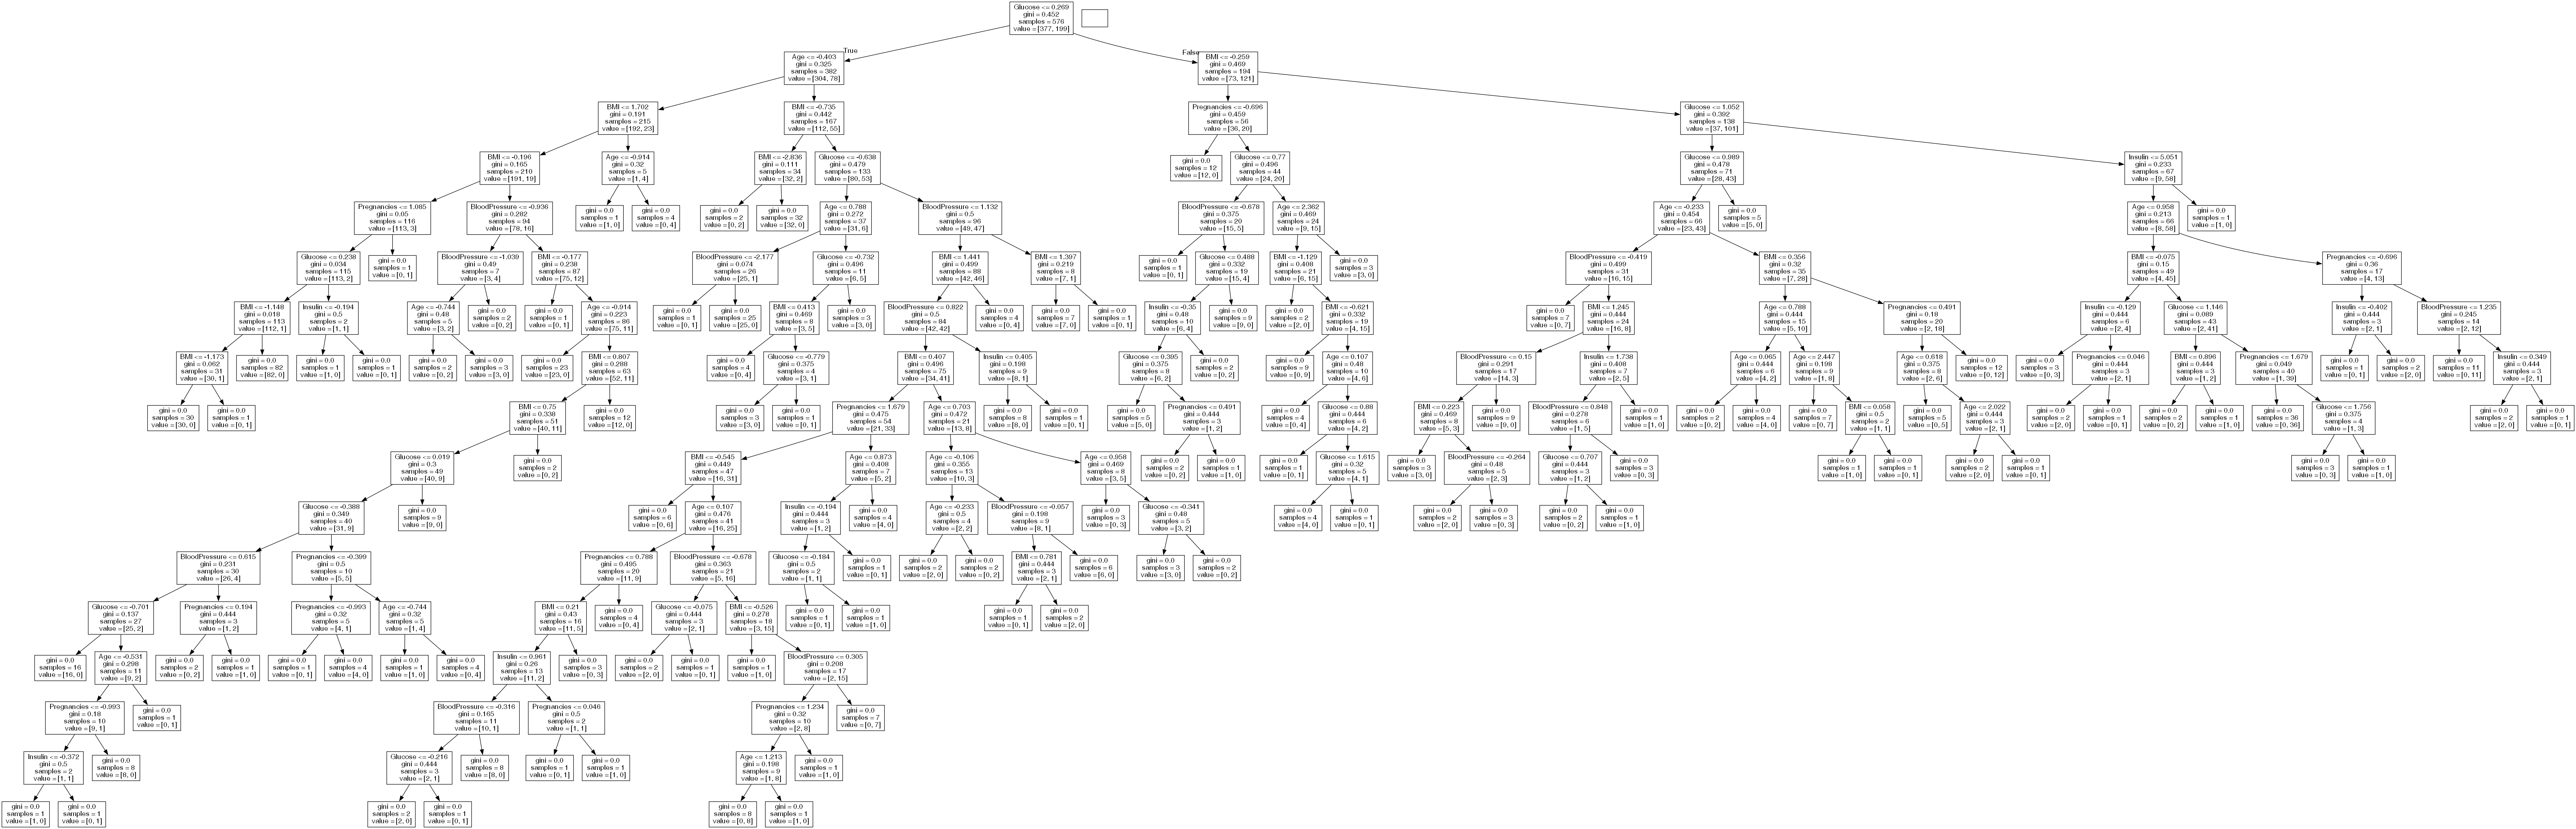

In [20]:
import os
from IPython.display import Image    
from sklearn import tree
from pydotplus import graph_from_dot_data 
from six import StringIO
from sklearn.tree import export_graphviz


dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_names)  
graph = graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

In [21]:
#Measure the accuracy of the resulting decision tree model using  test data
clf.score(testing_inputs, testing_classes)

0.6770833333333334

Instead of a single train/test split, use K-Fold cross validation to get a better measure of  model's accuracy (K=10)

In [22]:
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=1)

cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)

cv_scores.mean()

0.6795967190704031

In [23]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, random_state=1)
cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)

cv_scores.mean()

0.7485645933014354

# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)
cv_scores.mean()

0.7747607655502392